In [65]:
!pwd

/Users/shihosato/src/github.com/twinkle13531/master_degree/202012/backup_trial


In [66]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [67]:
import sys, os
sys.path.append(os.path.join('..','Random'))
sys.path.append(os.path.join('..', 'SA'))
sys.path.append(os.path.join('..', 'QA'))
sys.path.append(os.path.join('..', '4ti2', 'functions'))

In [68]:
import SA_exact_test_functions as net
import QA_DwaveSampler_AutoEmbedding as qda
import random_exact_test_functions as ret
import zsolve_t1 as zt
import pandas as pd
import numpy as np
import timeit
import matplotlib.pyplot as plt
import statistics
import time

In [70]:
bit = 20
num = 0

## random

In [25]:
num_reads = 10000

In [26]:
df_path = '../input/ost{}_{}.csv'.format(bit, num)
df = pd.read_csv(df_path, sep=',')
t_list = ret.calc_marginals(df)
print(bit, num, t_list)

20 0 [11  8  9  5]


In [27]:
df_path = '../input/ost{}_{}.csv'.format(bit, num)
df = pd.read_csv(df_path, sep=',')
df.head()

,Y,LI,SEX,AOP
0,0,1,1,0
1,1,1,1,1
2,0,1,1,1
3,1,1,1,1
4,0,1,1,1


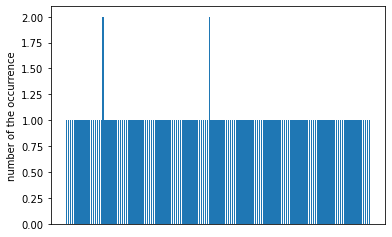

In [28]:
df_path = '../input/ost{}_{}.csv'.format(bit, num)
df = pd.read_csv(df_path, sep=',')
t_list = ret.calc_marginals(df)
valid_y_dic, calculation_time = ret.find_valid_y(df, num_reads)
if len(valid_y_dic) >0:
    rm = ret.Random_method(df, valid_y_dic, num_reads, t_list)
    plot_path = '../Random/{}bit/{}/Random_{}bit_{}_10000_occurence_hist.png'.format(bit, num, bit, num)
    rm.occurrence_hist(plot_path)

In [29]:
df_path = '../input/ost{}_{}.csv'.format(bit, num)
df = pd.read_csv(df_path, sep=',')
df.head()

,Y,LI,SEX,AOP
0,0,1,1,0
1,1,1,1,1
2,0,1,1,1
3,1,1,1,1
4,0,1,1,1


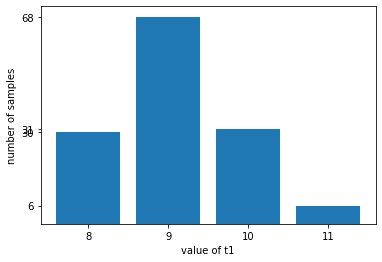

<Figure size 432x288 with 0 Axes>

In [30]:
df_path = '../input/ost{}_{}.csv'.format(bit, num)
df = pd.read_csv(df_path, sep=',')
t_list = ret.calc_marginals(df)
valid_y_dic, calculation_time = ret.find_valid_y(df, num_reads)
if len(valid_y_dic) >0:
    rm = ret.Random_method(df, valid_y_dic, num_reads, t_list)
    plot_path = '../Random/{}bit/{}/Random_{}bit_{}_10000_y_num_t1.png'.format(bit, num, bit, num)
    t_tic = rm.y_num_t1_hist(plot_path)

In [31]:
df_path = '../input/ost{}_{}.csv'.format(bit, num)
df = pd.read_csv(df_path, sep=',')
df.head()

,Y,LI,SEX,AOP
0,0,1,1,0
1,1,1,1,1
2,0,1,1,1
3,1,1,1,1
4,0,1,1,1


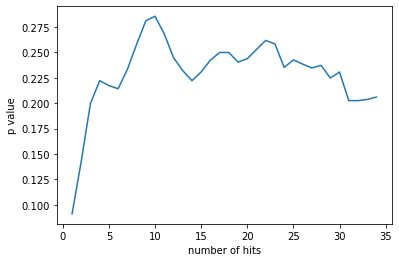

In [32]:
df_path = '../input/ost{}_{}.csv'.format(bit, num)
df = pd.read_csv(df_path, sep=',')
t_list = ret.calc_marginals(df)
valid_y_dic, calculation_time = ret.find_valid_y(df, num_reads)
if len(valid_y_dic) >0:
    rm = ret.Random_method(df, valid_y_dic, num_reads, t_list)
    output_path = '../Random/{}bit/{}/Random_{}bit_{}_10000_p_value_transition.png'.format(bit, num, bit, num)
    p_dic = rm.p_value_transition(output_path)

In [33]:
df_path = '../input/ost{}_{}.csv'.format(bit, num)
df = pd.read_csv(df_path, sep=',')
df.head()

,Y,LI,SEX,AOP
0,0,1,1,0
1,1,1,1,1
2,0,1,1,1
3,1,1,1,1
4,0,1,1,1


## SA

In [40]:
num_reads = 10000

In [41]:
path = '../input/ost{}_{}.csv'.format(bit, num)
df = pd.read_csv(path, sep=',')
res = net.make_res_data(df, num_reads)
valid_y_info_dic = net.find_valid_y(res)
rvd = net.SA_res_valid_dic(df, res, valid_y_info_dic, num_reads)

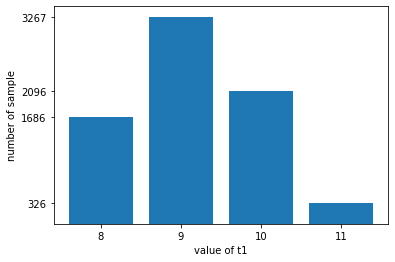

In [37]:
path = '../SA/{}bit/{}/nealSA_{}bit_{}_10000numreads.png'.format(bit, num, bit, num)
t_dic = rvd.y_num_hist(path)

In [38]:
df_path = '../input/ost{}_{}.csv'.format(bit, num)
df = pd.read_csv(df_path, sep=',')
df.head()

,Y,LI,SEX,AOP
0,0,1,1,0
1,1,1,1,1
2,0,1,1,1
3,1,1,1,1
4,0,1,1,1


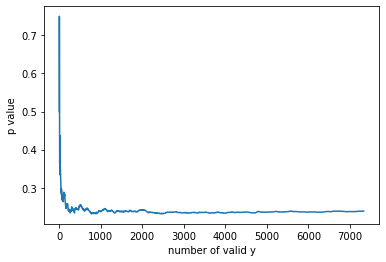

([(1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1),
  (0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1),
  (0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1),
  (1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0),
  (0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1),
  (1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0),
  (1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1),
  (1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1),
  (1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0),
  (1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1),
  (1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1),
  (0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1),
  (1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1),
  (0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1),
  (1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1),
  (1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0

In [43]:
output_path = '../SA/{}bit/{}/SA_{}bit_{}_10000_p_value_transition.png'.format(bit, num, bit, num)
rvd.p_value_transition(output_path)

In [44]:
df_path = '../input/ost{}_{}.csv'.format(bit, num)
df = pd.read_csv(df_path, sep=',')
df.head()

,Y,LI,SEX,AOP
0,0,1,1,0
1,1,1,1,1
2,0,1,1,1
3,1,1,1,1
4,0,1,1,1


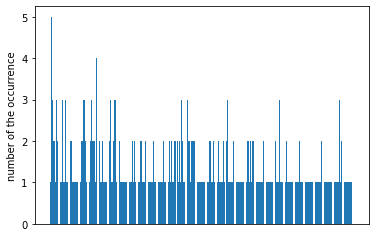

[1,
 1,
 3,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 3,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 3,
 1,
 1,
 2,
 1,
 1,
 5,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 3,
 2,
 2,
 2,
 1,
 3,
 1,
 1,
 1,
 2,
 1,
 3,
 1,
 2,
 1,
 2,
 3,
 3,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 3,
 3,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 3,
 2,
 1,
 4,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 3,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 3,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 4,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 3,
 3,
 2,
 2,
 1,
 1,
 1,
 1,
 3,
 3,
 1,
 1,
 1,
 2,
 3,
 1,
 3,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 3,
 2,
 2,
 1,
 1,
 2,
 4,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 3,
 1,
 2,
 3,
 3,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 3,
 1,
 2,
 2,
 1,


In [45]:
plot_path = '../SA/{}bit/{}/SA_{}bit_{}_10000_occurence_hist.png'.format(bit, num, bit, num)
rvd.occurrence_hist(plot_path)

In [46]:
df_path = '../input/ost{}_{}.csv'.format(bit, num)
df = pd.read_csv(df_path, sep=',')
df.head()

,Y,LI,SEX,AOP
0,0,1,1,0
1,1,1,1,1
2,0,1,1,1
3,1,1,1,1
4,0,1,1,1


In [47]:
rvd.calc_p_value()

0.2385496183206107

In [48]:
df_path = '../input/ost{}_{}.csv'.format(bit, num)
df = pd.read_csv(df_path, sep=',')
df.head()

,Y,LI,SEX,AOP
0,0,1,1,0
1,1,1,1,1
2,0,1,1,1
3,1,1,1,1
4,0,1,1,1


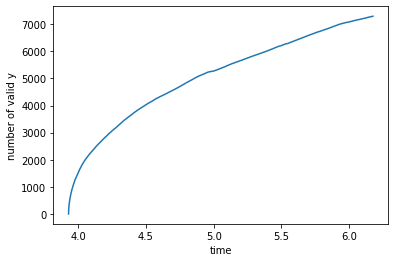

[3.9296140670776367,
 3.9296181201934814,
 3.9296209812164307,
 3.9296231269836426,
 3.929626226425171,
 3.9296281337738037,
 3.9296302795410156,
 3.9296319484710693,
 3.9296340942382812,
 3.9296371936798096,
 3.9296419620513916,
 3.9296460151672363,
 3.9296481609344482,
 3.9296512603759766,
 3.9296529293060303,
 3.9296560287475586,
 3.929659128189087,
 3.9296622276306152,
 3.929663896560669,
 3.9296681880950928,
 3.929671287536621,
 3.9296751022338867,
 3.929678201675415,
 3.9296822547912598,
 3.92968487739563,
 3.929687976837158,
 3.929692268371582,
 3.9296951293945312,
 3.9296979904174805,
 3.9297032356262207,
 3.9297070503234863,
 3.9297101497650146,
 3.9297142028808594,
 3.9297189712524414,
 3.9297220706939697,
 3.929725170135498,
 3.9297289848327637,
 3.9297330379486084,
 3.9297380447387695,
 3.9297420978546143,
 3.9297471046447754,
 3.9297499656677246,
 3.9297561645507812,
 3.9297609329223633,
 3.929765224456787,
 3.929769277572632,
 3.929774045944214,
 3.929781913757324,
 3.929

In [49]:
path = '../SA/{}bit/{}/SA_{}bit_{}_10000_num_y_transition.png'.format(bit, num, bit, num)
net.num_y_transition_nodup(df, num_reads, path)

In [50]:
df_path = '../input/ost{}_{}.csv'.format(bit, num)
df = pd.read_csv(df_path, sep=',')
df.head()

,Y,LI,SEX,AOP
0,0,1,1,0
1,1,1,1,1
2,0,1,1,1
3,1,1,1,1
4,0,1,1,1


## QA

In [71]:
n, num_reads = 100, 100

In [72]:
chain_strength = 10
bqm = qda.make_Hamiltonian(df)

In [73]:
qqda = qda.QA_DSampler_AEmbedding(df, bqm, n, num_reads, chain_strength)

In [74]:
df_path = '../input/ost{}_{}.csv'.format(bit, num)
df = pd.read_csv(df_path, sep=',')
df.head()

,Y,LI,SEX,AOP
0,0,1,1,0
1,1,1,1,1
2,0,1,1,1
3,1,1,1,1
4,0,1,1,1


In [75]:
valid_y_info_dic, calculation_time = qqda.find_valid_y_time_ntimes()

In [76]:
calculation_time

4639.216990265892

In [78]:
len(valid_y_info_dic)

804

In [77]:
df_path = '../input/ost{}_{}.csv'.format(bit, num)
df = pd.read_csv(df_path, sep=',')
df.head()

,Y,LI,SEX,AOP
0,0,1,1,0
1,1,1,1,1
2,0,1,1,1
3,1,1,1,1
4,0,1,1,1


In [79]:
n, num_reads = 1, 10000
chain_strength = 10
bqm = qda.make_Hamiltonian(df)
qqda = qda.QA_DSampler_AEmbedding(df, bqm, n, num_reads, chain_strength)

In [80]:
valid_y_info_dic, calculation_time = qqda.find_valid_y_time_ntimes()

In [81]:
calculation_time

27062.73950574453

In [82]:
len(valid_y_info_dic)

405

In [83]:
n, num_reads = 10, 1000
chain_strength = 10
bqm = qda.make_Hamiltonian(df)
qqda = qda.QA_DSampler_AEmbedding(df, bqm, n, num_reads, chain_strength)

In [84]:
valid_y_info_dic, calculation_time = qqda.find_valid_y_time_ntimes()

In [85]:
calculation_time

11426.399526069092

In [86]:
len(valid_y_info_dic)

563

In [89]:
df_path = '../input/ost{}_{}.csv'.format(bit, num)
df = pd.read_csv(df_path, sep=',')
df.head()

,Y,LI,SEX,AOP
0,0,1,1,0
1,1,1,1,1
2,0,1,1,1
3,1,1,1,1
4,0,1,1,1


#### n, num_readsについて
nが大きくなればなるほど、num_readsが小さくなればなるほど時間は短く、サンプル数は増える。

でも不思議なことに、実行をすると、時間がかかるのはnが大きくnum_readsが小さい組み合わせ。

In [101]:
#すぐ
n, num_reads = 10, 1000
chain_strength = 10
bqm = qda.make_Hamiltonian(df)
qqda = qda.QA_DSampler_AEmbedding(df, bqm, n, num_reads, chain_strength)

In [102]:
#時間がかかる
valid_y_info_dic, calculation_time = qqda.find_valid_y_time_ntimes()

In [103]:
valid_y_info_dic

{(1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1): [1, 0.0],
 (1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1): [1, 0.0],
 (1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1): [2, 0.0],
 (0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1): [2, 0.0],
 (1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1): [2, 0.0],
 (1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1): [1, 0.0],
 (1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1): [2, 0.0],
 (1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1): [1, 0.0],
 (1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1): [1, 0.0],
 (0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1): [1, 0.0],
 (1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1): [1, 0.0],
 (0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1): [1, 0.0],
 (1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1): [1, 0.05],
 (0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 

In [104]:
calculation_time

7070.790660164923

In [105]:
df_path = '../input/ost{}_{}.csv'.format(bit, num)
df = pd.read_csv(df_path, sep=',')
df.head()

,Y,LI,SEX,AOP
0,0,1,1,0
1,1,1,1,1
2,0,1,1,1
3,1,1,1,1
4,0,1,1,1


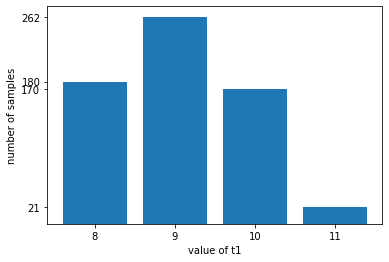

In [106]:
plot_path = '../QA/{}bit/{}/QA_{}bit_{}_10000_num_y_t1.png'.format(bit, num, bit, num)
hist_dic = qqda.y_num_t1_hist(valid_y_info_dic, plot_path)

In [107]:
df_path = '../input/ost{}_{}.csv'.format(bit, num)
df = pd.read_csv(df_path, sep=',')
df.head()

,Y,LI,SEX,AOP
0,0,1,1,0
1,1,1,1,1
2,0,1,1,1
3,1,1,1,1
4,0,1,1,1


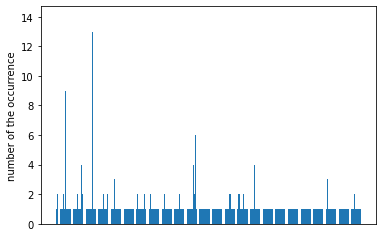

In [111]:
plot_path = '../QA/{}bit/{}/QA_{}bit_{}_10000_occurence_hist.png'.format(bit, num, bit, num)
occurrence_list = qqda.occurrence_hist(valid_y_info_dic, plot_path)

In [112]:
df_path = '../input/ost{}_{}.csv'.format(bit, num)
df = pd.read_csv(df_path, sep=',')
df.head()

,Y,LI,SEX,AOP
0,0,1,1,0
1,1,1,1,1
2,0,1,1,1
3,1,1,1,1
4,0,1,1,1


In [113]:
qqda.p_value(valid_y_info_dic)

0.2843601895734597

In [114]:
df_path = '../input/ost{}_{}.csv'.format(bit, num)
df = pd.read_csv(df_path, sep=',')
df.head()

,Y,LI,SEX,AOP
0,0,1,1,0
1,1,1,1,1
2,0,1,1,1
3,1,1,1,1
4,0,1,1,1


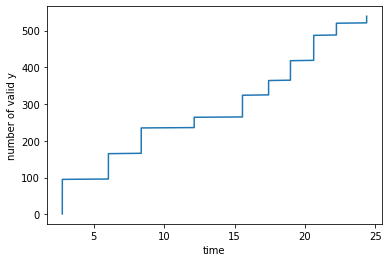

In [116]:
path = '../QA/{}bit/{}/QA_{}bit_{}_10000_num_y_transition.png'.format(bit, num, bit, num)
time_list = qqda.num_y_transition(path)

In [117]:
df_path = '../input/ost{}_{}.csv'.format(bit, num)
df = pd.read_csv(df_path, sep=',')
df.head()

,Y,LI,SEX,AOP
0,0,1,1,0
1,1,1,1,1
2,0,1,1,1
3,1,1,1,1
4,0,1,1,1


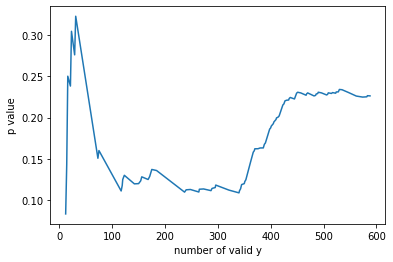

In [122]:
output_path = '../QA/{}bit/{}/QA_{}bit_{}_10000_p_value_transition.png'.format(bit, num, bit, num)
valid_y_list, p_dic = qqda.p_value_transition(output_path)

In [123]:
df_path = '../input/ost{}_{}.csv'.format(bit, num)
df = pd.read_csv(df_path, sep=',')
df.head()

,Y,LI,SEX,AOP
0,0,1,1,0
1,1,1,1,1
2,0,1,1,1
3,1,1,1,1
4,0,1,1,1
